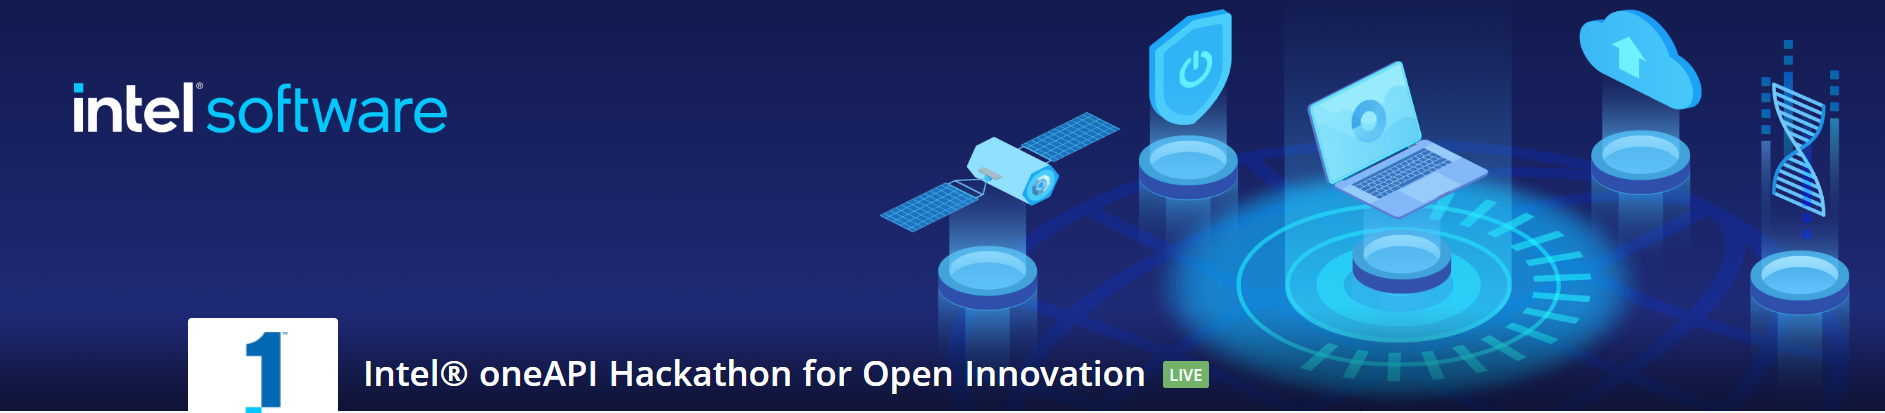

<h2><font color='green'> Computer Vision Challenge Track: Target and Eliminate </font></h2>

**Problem:**

Weeds to increase crop yields Weeds are an unwanted intruder in the agricultural business. They steal nutrients, water, land, and other critical resources to grow healthy crops. These intruders can lead to lower yields and inefficient deployment of resources by farmers. One known approach is to use pesticides to remove weeds, but aggressive pesticides create health risks for humans. Computer vision technology can automatically detect the presence of weeds and use targeted remediation techniques to remove them from fields with minimal environmental impact.

**Expected Solution:**

In this hackathon track, you will be tasked with training and deploying a model into a simulated production environment - where your binary-classification accuracy (F1 score) and inference time will be used to rank you against other teams competing for this track's top spot.



<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> We leveraged the following Intel® AI Analytics Toolkit (AI Kit) - OneAPI Libraries for this model development </font></h3>

<ol>
    <li><b>Intel® Optimization for TensorFlow*</b></li>
    <li><b>Intel® Neural Compressor*</b></li>
    <li><b>Intel® Optimization for PyTorch* </b></li>
</ol>
<hr>
<b><font color='red'>This has greatly reduced the time of our overall processing compared to standard libraries </font></b>

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Importing IntelTensorflow API </font></h3>


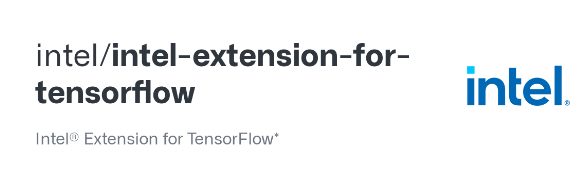

In [7]:
#pip install --upgrade intel-extension-for-tensorflow[cpu]
import tensorflow as tf

from neural_compressor.config import PostTrainingQuantConfig
from neural_compressor.data import DataLoader
from neural_compressor.data import Datasets

print(tf.__version__)

2.11.0


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Importing all the required Python libraries (Intel API and others)</font></h3>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import glob
import cv2
import numpy as np
import math 
import datetime
import time
import random
import gc
from tqdm import tqdm
from IPython.display import Markdown, display

In [9]:
import keras
import tensorflow as tf
from sklearn import metrics
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten,Conv2D,MaxPooling2D 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import optimizers
from tensorflow.keras import applications 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Preparing the Dataset </font></h3>

<i> From the original <b>dataset ( data folder )</b> extracting the images in two different folders called <b>'No_Weed'</b> and <b>'Weed'</b> based on the labels given in the text file related to the Images. Images with <b>Class 0</b> goes to <b>'No_Weed'</b> folder and Images with <b>Class 1</b> goes to <b>'Weed'</b> folder  </i>

In [10]:
path = 'Dataset/data/'
target_0 = 'Dataset/No_Weed/' 
target_1 = 'Dataset/Weed/'
ctr = 0
if not os.path.isdir(target_0) and not os.path.isdir(target_1):
    os.mkdir(target_0)
    os.mkdir(target_1)
    for i in range(1, len(os.listdir(path)), 2):
        file = os.listdir(path)[i]
        img = os.listdir(path)[i - 1]
        abs_path = path + file
        f = open(abs_path, 'r')
        target = f.read()
        if int(target[0]) == 0:
            src_path = path + img
            shutil.copy(src_path, target_0)
        else:
            src_path = path + img
            shutil.copy(src_path, target_1)

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Loading the Dataset </font></h3>

<i>- Dividing the datset based on labels. data_0 contains all the images which are not infected with weed and data_1 contains all the images which are infected with weed and likewise for test data also.</i>

In [11]:
from sklearn import datasets
dataset = 'Dataset'
#TEST_DIR = f'{DATADIR}/data/test'
#IMG_SIZE = 50
#LR = 1e-3

#Getting Train Data - No Weed and Weed
data_0 = [dataset + '/No_Weed' + '/' + '{}'.format(i) 
              for i in os.listdir(dataset + '/No_Weed')]  
data_1 = [dataset + '/Weed' + '/' + '{}'.format(i) 
              for i in os.listdir(dataset + '/Weed')]  


imgs_data = data_0 + data_1  
#random.shuffle(train_imgs)  # shuffle it randomly

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Data Pre-Processing </font></h3>

<i>- function to read and process the images to an acceptable format for our machine learning model</i>

In [12]:
nrows = 224
ncolumns = 224
#channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    
    X = [] # images
    y = [] # labels
    
    for image in tqdm(list_of_images):
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), 
                            (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'No_Weed' in image[:15]:
            y.append(0)
        elif 'Weed' in image[:15]:
            y.append(1)
    
    return X, y

In [13]:
X, y = read_and_process_image(imgs_data)

100%|██████████████████████████████████████████████████████████████████████████████| 1301/1301 [00:19<00:00, 68.10it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.57it/s]


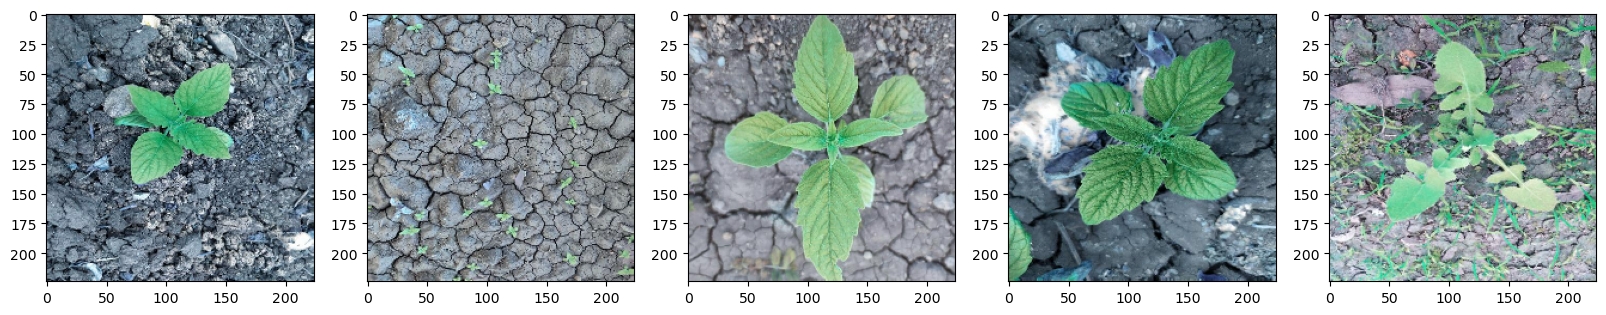

In [14]:
plt.figure(figsize=(20,10))
columns = 5
for i in tqdm(range(columns)):
    plt.subplot(5 // columns + 1, columns, i + 1)
    plt.imshow(X[i])

C:\Users\ashutoshvmadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Labels for No_Weed and Weed')

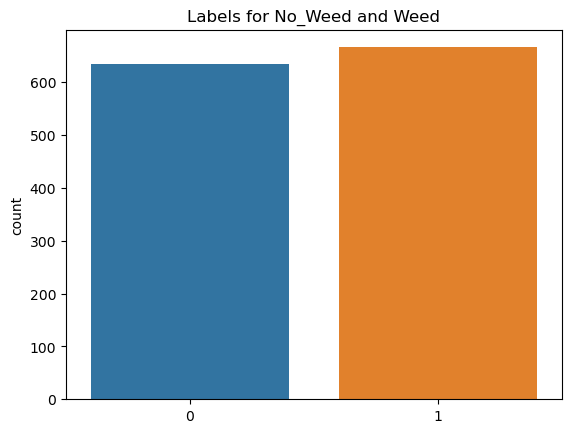

In [15]:
del imgs_data
gc.collect()

#Convert list to numpy array
X = np.array(X)
y = np.array(y)


#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for No_Weed and Weed')

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Splitting the Data into Training and Testing Set </font></h3>

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (1040, 224, 224, 3)
Shape of validation images is: (261, 224, 224, 3)
Shape of labels is: (1040,)
Shape of labels is: (261,)


In [17]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (1301, 224, 224, 3)
Shape of labels is: (1301,)


In [18]:
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)
print(ntrain)
print(nval)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32

1040
261


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Preparing our Initial Model for Training </font></h3>

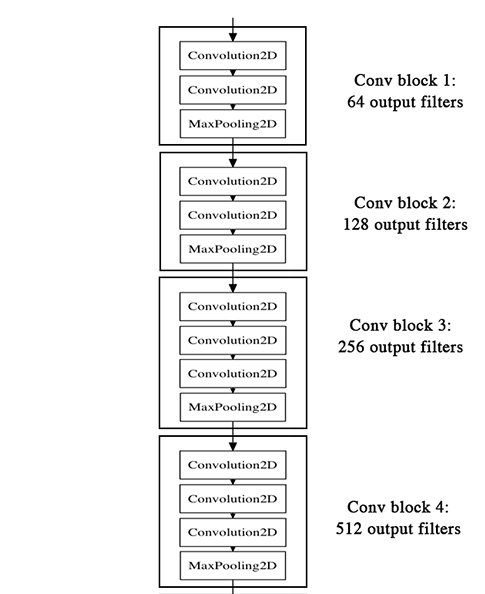

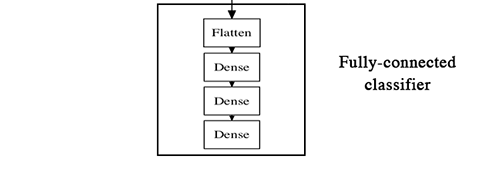

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))  #Dropout for regularization
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=50,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

#added
train_datagen = ImageDataGenerator(rescale=1./255   #Scale the image between 0 and 1
                                  )


val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [22]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Training our Initial Model </font></h3>

In [23]:
history = model.fit(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=50,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/50
32/32 [==============================] - 39s 1s/step - loss: 0.7865 - acc: 0.5169 - val_loss: 0.6841 - val_acc: 0.5391
Epoch 2/50
32/32 [==============================] - 38s 1s/step - loss: 0.7231 - acc: 0.5893 - val_loss: 0.5618 - val_acc: 0.7148
Epoch 3/50
32/32 [==============================] - 37s 1s/step - loss: 0.6851 - acc: 0.6240 - val_loss: 0.4502 - val_acc: 0.7969
Epoch 4/50
32/32 [==============================] - 35s 1s/step - loss: 0.5548 - acc: 0.7529 - val_loss: 0.3994 - val_acc: 0.8359
Epoch 5/50
32/32 [==============================] - 33s 1s/step - loss: 0.4938 - acc: 0.7966 - val_loss: 0.3615 - val_acc: 0.8477
Epoch 6/50
32/32 [==============================] - 34s 1s/step - loss: 0.4548 - acc: 0.8075 - val_loss: 0.3842 - val_acc: 0.8477
Epoch 7/50
32/32 [==============================] - 34s 1s/step - loss: 0.4558 - acc: 0.8234 - val_loss: 0.3577 - val_acc: 0.8555
Epoch 8/50
32/32 [==============================] - 34s 1s/step - loss: 0.3945 - acc: 0.84

<b> Using Tensorflow Intel API We were able to train our model faster then usual </b>

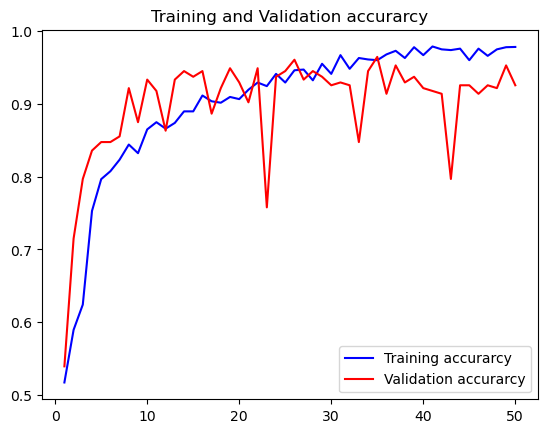

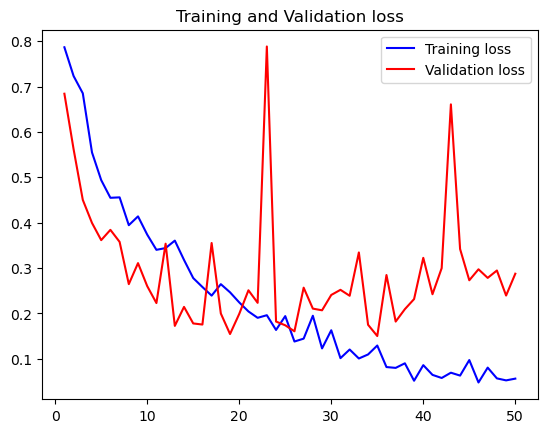

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()



plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Validating our Initial Model </font></h3>

In [25]:
Y_pred = model.predict(X_val)
print(Y_pred.shape)
#y_pred = np.argmax(Y_pred, axis=1) - used for multiclass
y_pred = (Y_pred > 0.5) * 1.0
y_pred = y_pred.reshape(y_val.shape)
y_pred.sum()

9/9 [==============================] - 3s 248ms/step
(261, 1)


146.0

In [26]:
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))


print('Classification Report')
target_names = ['Weed', 'No Weed']
print(classification_report(y_val, y_pred,target_names=target_names))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

Confusion Matrix
[[105  17]
 [ 10 129]]
Classification Report
              precision    recall  f1-score   support

        Weed       0.91      0.86      0.89       122
     No Weed       0.88      0.93      0.91       139

    accuracy                           0.90       261
   macro avg       0.90      0.89      0.90       261
weighted avg       0.90      0.90      0.90       261

Accuracy: 0.896552
Precision: 0.883562
Recall: 0.928058
F1 score: 0.905263


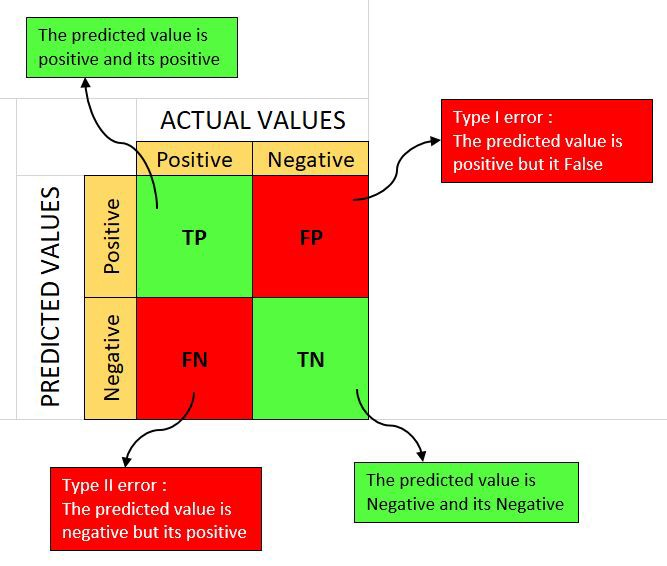

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Transfer Learning </font></h3>

<i>- Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.
Transfer learning can be used when the dataset is small, by using a pre-trained model on similar images we can easily achieve high performance.</i>

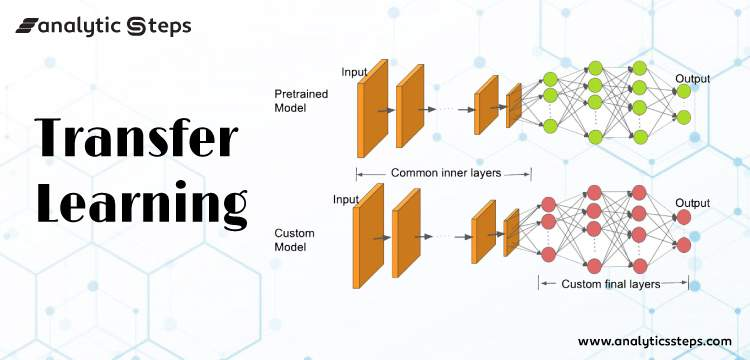

In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [28]:
base_model.trainable = False

In [29]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(1, activation="sigmoid")                                     
                                ])

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Training our Final Model </font></h3>

In [30]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs = 50 , validation_data = (X_val, y_val))

Epoch 1/50
33/33 [==============================] - 21s 510ms/step - loss: 0.5534 - accuracy: 0.7260 - val_loss: 0.3660 - val_accuracy: 0.8889
Epoch 2/50
33/33 [==============================] - 16s 486ms/step - loss: 0.3868 - accuracy: 0.8567 - val_loss: 0.2973 - val_accuracy: 0.9004
Epoch 3/50
33/33 [==============================] - 16s 486ms/step - loss: 0.3325 - accuracy: 0.8798 - val_loss: 0.2698 - val_accuracy: 0.9004
Epoch 4/50
33/33 [==============================] - 16s 497ms/step - loss: 0.3236 - accuracy: 0.8913 - val_loss: 0.2513 - val_accuracy: 0.9119
Epoch 5/50
33/33 [==============================] - 16s 477ms/step - loss: 0.3080 - accuracy: 0.8923 - val_loss: 0.2355 - val_accuracy: 0.9157
Epoch 6/50
33/33 [==============================] - 16s 480ms/step - loss: 0.2821 - accuracy: 0.8971 - val_loss: 0.2379 - val_accuracy: 0.9272
Epoch 7/50
33/33 [==============================] - 16s 479ms/step - loss: 0.2806 - accuracy: 0.8981 - val_loss: 0.2433 - val_accuracy: 0.9195

<b> Using Tensorflow Intel API We were able to train our model faster then usual </b>

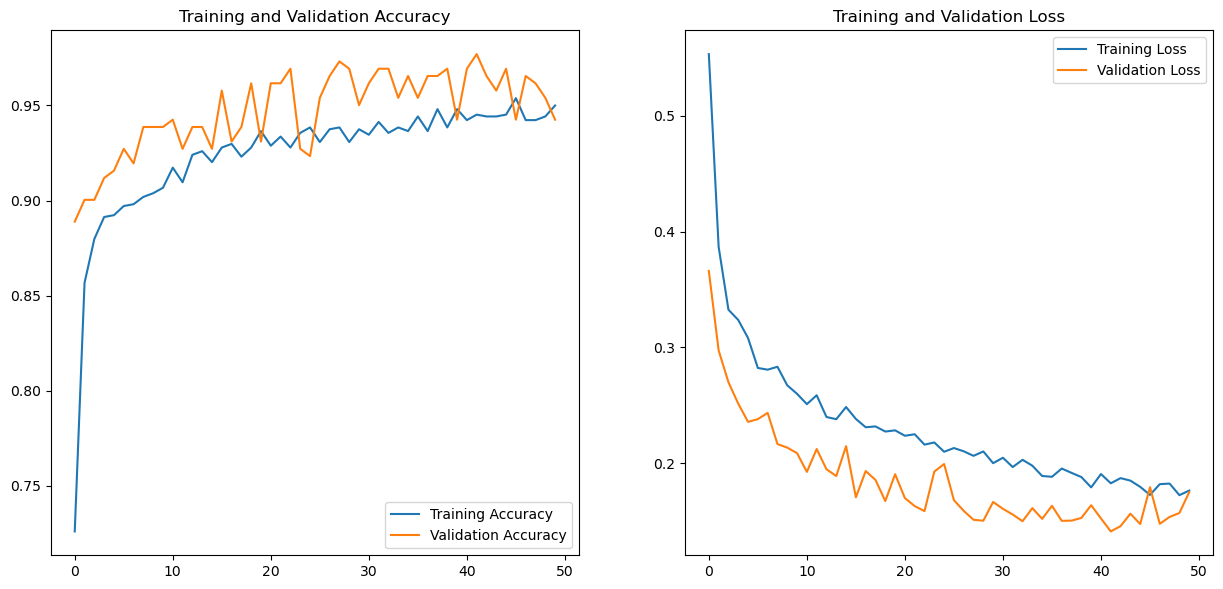

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
Y_pred = model.predict(X_val)
print(Y_pred.shape)
#y_pred = np.argmax(Y_pred, axis=1) - used for multiclass
y_pred = (Y_pred > 0.5) * 1.0
y_pred = y_pred.reshape(y_val.shape)
y_pred.sum()

9/9 [==============================] - 4s 354ms/step
(261, 1)


124.0

<b> Inference Time of our Final Model is 342ms/step </b>

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Calculating all the Evaluation Matrix </font></h3>

In [33]:
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))


print('Classification Report')
target_names = ['No Weed', 'Weed']
print(classification_report(y_val, y_pred,target_names=target_names))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

Confusion Matrix
[[122   0]
 [ 15 124]]
Classification Report
              precision    recall  f1-score   support

     No Weed       0.89      1.00      0.94       122
        Weed       1.00      0.89      0.94       139

    accuracy                           0.94       261
   macro avg       0.95      0.95      0.94       261
weighted avg       0.95      0.94      0.94       261

Accuracy: 0.942529
Precision: 1.000000
Recall: 0.892086
F1 score: 0.942966


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Confusion Matrix </font></h3>

In [34]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

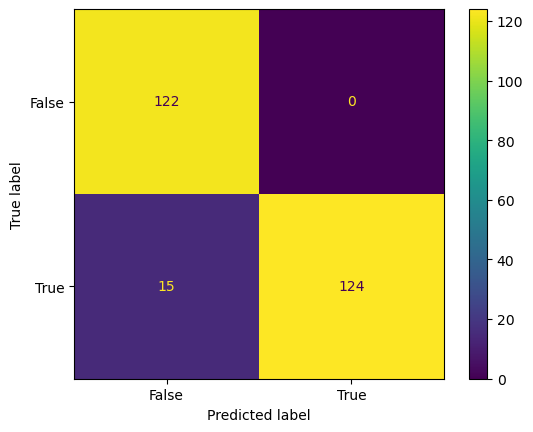

In [35]:
cm_display.plot()
plt.show()

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Weed Detection Assignment Summary </font></h3>

<h3><font color='blue'> We are able to achieve F1 Score of 0.95 with a inference time of 354ms / step with this Model </font></h3>

In [39]:
f1 = f1_score(y_val, y_pred)

In [40]:
f1_text = f"**F1 Score:** {f1:.2f}"
display(Markdown(f1_text))

**F1 Score:** 0.94